## Project Step II

#### Group 15 - Clare Garberg - cag199
#### Group 15 - Kajal Tiwary - kt755
#### Group 15 - Nina Thomas - cat122

In [51]:
## Show the first six records in the data frame 
import pandas as pd
# filename = 'anly605-project/merged_streaming_history.csv' 
filename = 'merged_streaming_history.csv' # different file structure in part 3
df = pd.read_csv(filename, header=0)
df.head(6)

,end_time,artist_name,track_name,ms_played,frequency,song_ids,release_date,popularity,images,preview,...,key,instrumentalness,liveness,loudness,mode,speechiness,valence,tempo,time_signature,label
0,2021-09-06 04:40,Miguel,waves - Tame Impala Remix,253346,37.0,3lB0GMiI5KxDbTOG8V3bOx,2016-02-26,67.0,https://i.scdn.co/image/ab67616d0000b273c4daf0...,https://p.scdn.co/mp3-preview/9fe5af6f2d0ee69e...,...,2.0,0.000005,0.2540,-3.599,1.0,0.0412,0.543,108.024,4.0,nina
1,2021-09-06 04:44,DaBaby,Suge,224910,8.0,2gwkD6igEhQbDQegRCcdoB,2019-03-01,72.0,https://i.scdn.co/image/ab67616d0000b27374d72e...,https://p.scdn.co/mp3-preview/b5b3e4ac62d79e55...,...,2.0,0.000000,0.1270,-6.482,0.0,0.4260,0.844,75.445,4.0,nina
2,2021-09-06 04:49,Anderson .Paak,Tints (feat. Kendrick Lamar),268400,61.0,7c3SbTuufigBWURcICnAWy,2018-11-16,60.0,https://i.scdn.co/image/ab67616d0000b273524aa1...,https://p.scdn.co/mp3-preview/f64cf13b4b12993c...,...,1.0,0.000000,0.0578,-6.730,0.0,0.1200,0.703,109.076,4.0,nina
3,2021-09-06 04:54,Kendrick Lamar,Wesley's Theory,287360,5.0,7Ks4VCY1wFebnOdJrM13t6,2015-03-16,68.0,https://i.scdn.co/image/ab67616d0000b273cdb645...,https://p.scdn.co/mp3-preview/d15b44300495eafc...,...,7.0,0.000028,0.2600,-6.754,1.0,0.2650,0.507,114.449,4.0,nina
4,2021-09-06 05:04,Anderson .Paak,Might Be,149079,14.0,2WlOO5UM3eoEQt7Z2z3PU1,2014-10-28,54.0,https://i.scdn.co/image/ab67616d0000b2731904cf...,https://p.scdn.co/mp3-preview/6240607cf1052142...,...,2.0,0.000001,0.7280,-7.601,1.0,0.0712,0.335,148.507,4.0,nina
5,2021-09-06 05:08,again&again,eighty-five,192315,169.0,3QqdwK6b3QTRIWkT9oNYb1,2020-03-16,48.0,https://i.scdn.co/image/ab67616d0000b27339fb33...,https://p.scdn.co/mp3-preview/a099a9231a6d5584...,...,11.0,0.000039,0.1410,-8.865,0.0,0.0598,0.797,94.995,4.0,nina


In [52]:
# removing non-quantitative variables
toremove = ["end_time", "artist_name", "track_name", "song_ids", "images", "preview"]
df = df.drop(toremove, axis=1)
df.head(6)

,ms_played,frequency,release_date,popularity,acousticness,danceability,energy,key,instrumentalness,liveness,loudness,mode,speechiness,valence,tempo,time_signature,label
0,253346,37.0,2016-02-26,67.0,0.3080,0.529,0.894,2.0,0.000005,0.2540,-3.599,1.0,0.0412,0.543,108.024,4.0,nina
1,224910,8.0,2019-03-01,72.0,0.0608,0.876,0.662,2.0,0.000000,0.1270,-6.482,0.0,0.4260,0.844,75.445,4.0,nina
2,268400,61.0,2018-11-16,60.0,0.0859,0.805,0.833,1.0,0.000000,0.0578,-6.730,0.0,0.1200,0.703,109.076,4.0,nina
3,287360,5.0,2015-03-16,68.0,0.3590,0.509,0.787,7.0,0.000028,0.2600,-6.754,1.0,0.2650,0.507,114.449,4.0,nina
4,149079,14.0,2014-10-28,54.0,0.3570,0.684,0.585,2.0,0.000001,0.7280,-7.601,1.0,0.0712,0.335,148.507,4.0,nina
5,192315,169.0,2020-03-16,48.0,0.0900,0.710,0.618,11.0,0.000039,0.1410,-8.865,0.0,0.0598,0.797,94.995,4.0,nina


In [53]:
# changing date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['label'] = df['label'].map({'clare': 1, 'nina': 0})

In [54]:
# getting year only
df['release_date'] = pd.DatetimeIndex(df['release_date']).year
df.head(6)

,ms_played,frequency,release_date,popularity,acousticness,danceability,energy,key,instrumentalness,liveness,loudness,mode,speechiness,valence,tempo,time_signature,label
0,253346,37.0,2016,67.0,0.3080,0.529,0.894,2.0,0.000005,0.2540,-3.599,1.0,0.0412,0.543,108.024,4.0,0
1,224910,8.0,2019,72.0,0.0608,0.876,0.662,2.0,0.000000,0.1270,-6.482,0.0,0.4260,0.844,75.445,4.0,0
2,268400,61.0,2018,60.0,0.0859,0.805,0.833,1.0,0.000000,0.0578,-6.730,0.0,0.1200,0.703,109.076,4.0,0
3,287360,5.0,2015,68.0,0.3590,0.509,0.787,7.0,0.000028,0.2600,-6.754,1.0,0.2650,0.507,114.449,4.0,0
4,149079,14.0,2014,54.0,0.3570,0.684,0.585,2.0,0.000001,0.7280,-7.601,1.0,0.0712,0.335,148.507,4.0,0
5,192315,169.0,2020,48.0,0.0900,0.710,0.618,11.0,0.000039,0.1410,-8.865,0.0,0.0598,0.797,94.995,4.0,0


In [55]:
# checking datatypes
df.dtypes

ms_played             int64
frequency           float64
release_date          int64
popularity          float64
acousticness        float64
danceability        float64
energy              float64
key                 float64
instrumentalness    float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
valence             float64
tempo               float64
time_signature      float64
label                 int64
dtype: object

In [56]:
## Describe the pandas data frame using describe 
df.describe()

,ms_played,frequency,release_date,popularity,acousticness,danceability,energy,key,instrumentalness,liveness,loudness,mode,speechiness,valence,tempo,time_signature,label
count,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000
mean,193976.895122,44.567265,2016.245433,68.257716,0.201374,0.638121,0.655175,5.229472,0.010179,0.173389,-6.440869,0.598873,0.077087,0.542445,120.772493,3.962759,0.500098
std,62533.624105,50.133995,9.908853,12.646426,0.230789,0.126481,0.145416,3.809904,0.059645,0.124195,2.257651,0.490136,0.068633,0.223778,28.306535,0.244855,0.500010
min,45010.000000,3.000000,1959.000000,17.000000,0.000062,0.128000,0.084700,0.000000,0.000000,0.026400,-19.197000,0.000000,0.023500,0.038100,57.860000,1.000000,0.000000
25%,164441.000000,12.000000,2016.000000,61.000000,0.028100,0.554000,0.570000,1.000000,0.000000,0.093900,-7.754000,0.000000,0.037700,0.355500,99.729000,4.000000,0.000000
50%,198453.000000,27.000000,2020.000000,68.000000,0.101000,0.640000,0.664000,5.000000,0.000004,0.123000,-6.124000,1.000000,0.052000,0.550000,115.982000,4.000000,1.000000
75%,226733.000000,60.000000,2021.000000,78.000000,0.301000,0.730000,0.756000,9.000000,0.000221,0.219000,-4.869000,1.000000,0.089100,0.719000,142.058000,4.000000,1.000000
max,731350.000000,276.000000,2022.000000,96.000000,0.968000,0.949000,0.989000,11.000000,0.910000,0.976000,-1.538000,1.000000,0.463000,0.985000,205.272000,5.000000,1.000000


In [57]:
## Show the correlation heat plot of the entire dataset 
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(500, 10, sep=10, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [58]:
## Show the distribution plots of each variable 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12),dpi=150)
plt.rcParams.update({'font.size': 8})
plt.rcParams['text.color'] = "green"
plt.rcParams['xtick.color'] = "black"
plt.rcParams['ytick.color'] = "black"
df.hist(color="green")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febaf705970>,
      dtype=object)

In [59]:
## histogram of output variable
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.9',
      'grid.linestyle':'-.',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
sns.distplot(df['label'])
plt.title("Histogram of Label Distribution", loc='left', fontsize=14,fontweight='bold',color='#003366')
plt.xlabel("Label", fontsize=12,fontweight='bold',color='#003366')
plt.ylabel("Frequency", fontsize=12,fontweight='bold',color='#003366')
plt.savefig('label_distribution.jpg',dpi=300)

/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [60]:
## Import all necessary libraries 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

## Identify the x and y variables in the dataset 
x_df = df.loc[:, df.columns != 'label'].to_numpy()
y_df = df.iloc[:,-1:].to_numpy()

## Split the data into training and test sets 
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.30, random_state=0)

In [61]:
## Print the shape of each variable to ensure intended results 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17894, 16)
(7669, 16)
(17894, 1)
(7669, 1)


In [62]:
## using z score normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x_train = sc.fit_transform(X_train)
#x_test = sc.transform(X_test)

## Adaboost

In [63]:
## importing adaboost and gridsearch for hyperparameter tuning
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

"""
Fitting 5 folds for each of 16 candidates, totalling 80 fits

========================================================
 Results from Grid Search 
========================================================

 The best estimator across ALL searched params:
 AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)

 The best score across ALL searched params:
 0.4830102809210489

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'n_estimators': 100}

 ========================================================
"""

def ada_training_model(x_train, y_train):
        model = AdaBoostClassifier(n_estimators=100, learning_rate = 1, random_state=0)
        # parameters
        parameters = {'learning_rate': [0.1],
                      'n_estimators' : [100]
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, 
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(x_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)
    

# training the model with the function defined above
ada_best = ada_training_model(x_train, y_train.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0 when using version 1.1.2. This might lead


 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)

 The best score across ALL searched params:
 0.4830102809210489

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'n_estimators': 100}



In [64]:
# fitting the best fit adaboost model
#ada_best = AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, random_state=0)
ada_fit = ada_best.fit(x_train, y_train.ravel())

# obtaining predictions from the best fit model
aday_pred = ada_fit.predict(x_test)

from sklearn.metrics import accuracy_score
ada_acc = accuracy_score(y_test, aday_pred)

In [65]:
!pip install scikit-plot


Evaluation of the trained model: 

Accuracy :  0.4665536575824749

Kappa Score :  -0.06714981226846062

Confusion Matrix :
 [[1894 1959]
 [2132 1684]]

Classification Report :
               precision    recall  f1-score   support

           0       0.47      0.49      0.48      3853
           1       0.46      0.44      0.45      3816

    accuracy                           0.47      7669
   macro avg       0.47      0.47      0.47      7669
weighted avg       0.47      0.47      0.47      7669



<Figure size 2000x2000 with 0 Axes>

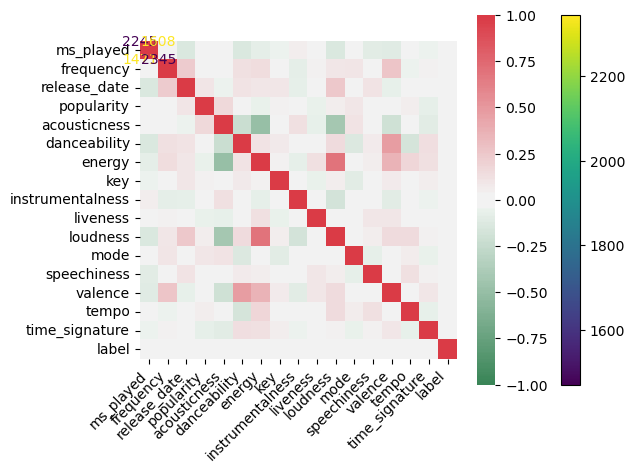

<Figure size 1800x1800 with 0 Axes>

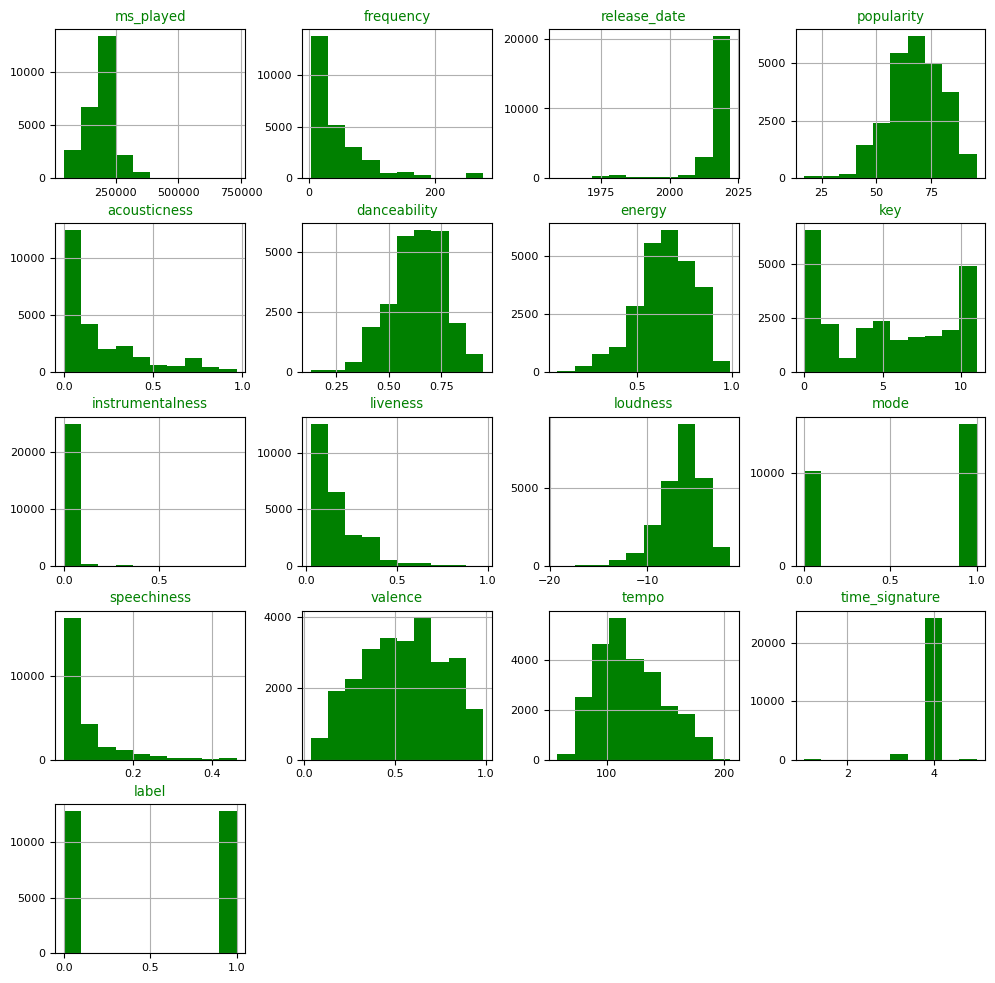

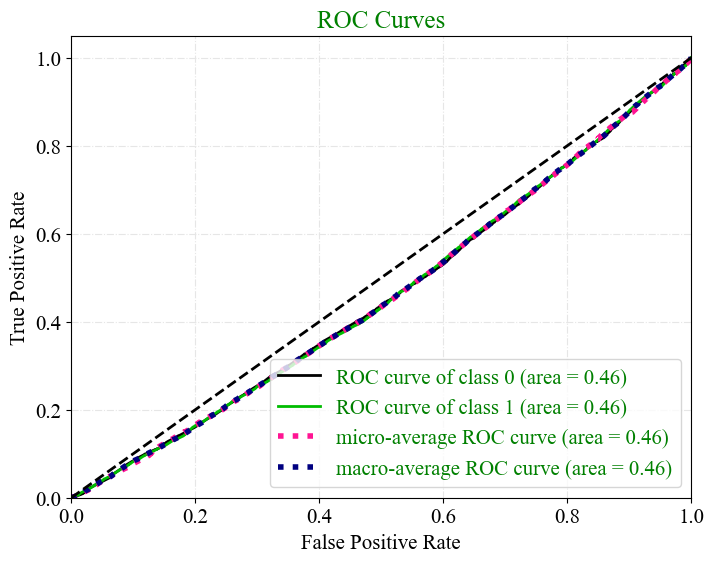

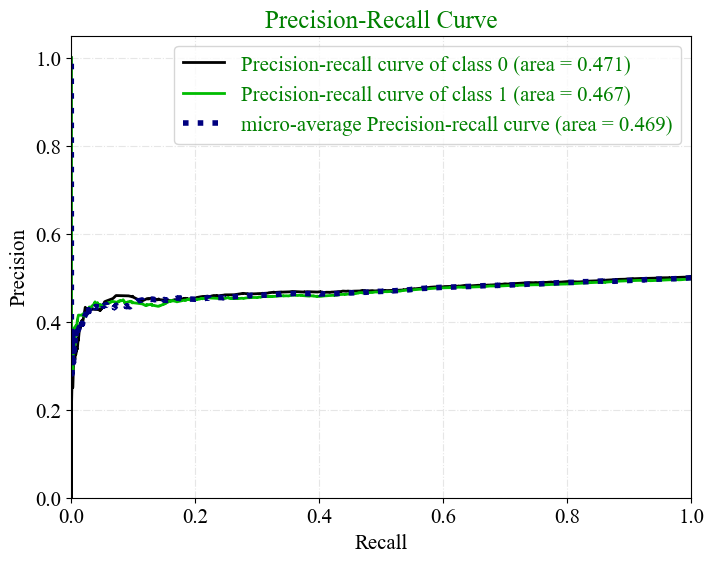

In [66]:
# adapted from lecture notes
# evaluates model with metrics and ROC curves
import scikitplot as skplt
from sklearn.metrics import cohen_kappa_score

# -----------------------------------------------
# Evaluate the skill of the Trained model
# -----------------------------------------------
def evaluate_model(model, X_test, y_test):
        pred_Class          = model.predict(X_test)
        acc                 = accuracy_score(y_test, pred_Class)
        classReport         = classification_report(y_test, pred_Class)
        confMatrix          = confusion_matrix(y_test, pred_Class) 
        kappa_score         = cohen_kappa_score(y_test, pred_Class)         
        
        print(); print('Evaluation of the trained model: ')
        print(); print('Accuracy : ', acc)
        print(); print('Kappa Score : ', kappa_score)
        print(); print('Confusion Matrix :\n', confMatrix)
        print(); print('Classification Report :\n',classReport)

        pred_proba = model.predict_proba(X_test)
        
        # Add more plots here using scikit-plot
        # ROC curves
        skplt.metrics.plot_roc(y_test,pred_proba,figsize=(8,6)); plt.show()

        # Confusion matrix
        #skplt.metrics.plot_confusion_matrix(y_test,pred_Class,figsize=(8,6)); plt.show()        

        # precision recall curve
        skplt.metrics.plot_precision_recall(y_test, pred_proba, 
                title='Precision-Recall Curve', plot_micro=True, 
                classes_to_plot=None, ax=None, figsize=(8,6), 
                cmap='nipy_spectral', title_fontsize='large', 
                text_fontsize='medium'); plt.show()        
        
        return 
    
evaluate_model(ada_best, x_test, y_test)

In [67]:
!pip install scikit-learn==1.1.2
!pip install sklearn

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(20,20))
set_palette("Paired")

conf_matrix = confusion_matrix(y_test, aday_pred)
ConfusionMatrixDisplay.from_estimator(ada_fit, x_test, y_test)


Feature Importance/Rank Analysis: 
1. feature 10 loudness (0.300000)
2. feature 13 valence (0.150000)
3. feature 12 speechiness (0.100000)
4. feature 3 popularity (0.100000)
5. feature 4 acousticness (0.090000)
6. feature 5 danceability (0.080000)
7. feature 9 liveness (0.050000)
8. feature 7 key (0.050000)
9. feature 0 ms_played (0.050000)
10. feature 8 instrumentalness (0.030000)
11. feature 15 time_signature (0.000000)
12. feature 14 tempo (0.000000)
13. feature 11 mode (0.000000)
14. feature 6 energy (0.000000)
15. feature 2 release_date (0.000000)
16. feature 1 frequency (0.000000)


<Figure size 2000x2000 with 0 Axes>

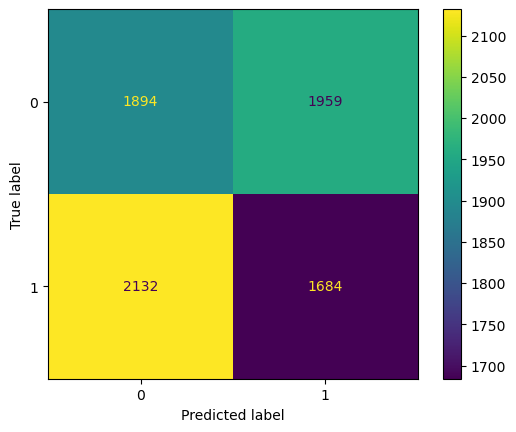

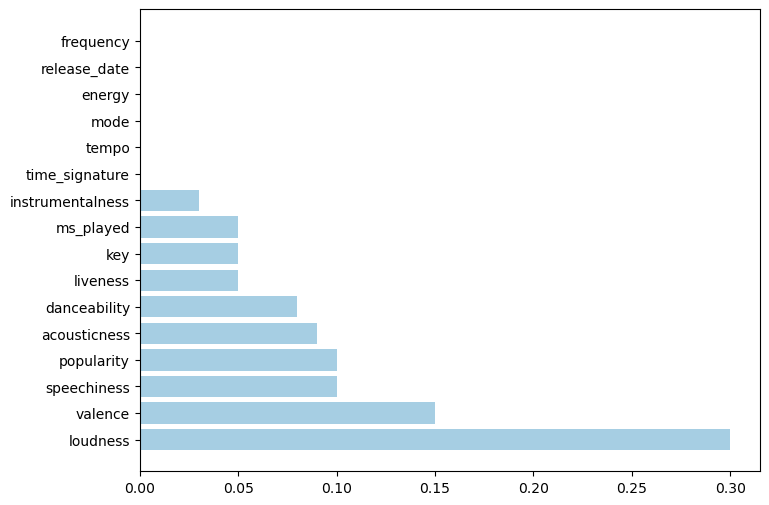

In [69]:
# getting feature importance
# adapted from lecture notes
import numpy as np

# ------------------------------------------------
# Feature Rank Analysis
# -------------------------------------------------
def featureRank_Analysis(model, dataset, cols):
        print()
        print("Feature Importance/Rank Analysis: ")
        X = dataset.loc[:, cols]; X_cols = X.columns.values
    
        features_imp = model.feature_importances_    
    
        indices = np.argsort(features_imp)[::-1]
        df = {}
        for f in range(X.shape[1] -1):
            print("%d. feature %d %s (%f)" % (f + 1, indices[f], X_cols[indices[f]], 
                                              features_imp[indices[f]]))
            df[f] = [f + 1, indices[f], X_cols[indices[f]], features_imp[indices[f]]]

        df1 = pd.DataFrame.from_dict(df, orient = 'index')
        df1.columns = ['feature_Rank', 'feature_Index', 'feature_Name', 'feature_importance']
        #df1.to_csv("FeatureImportanceRank.csv", index = False)

        # this creates a figure 5 inch wide, 3 inch high
        plt.figure(figsize=(8,6)) 
        plt.barh(df1['feature_Rank'], df1['feature_importance'], tick_label = df1['feature_Name'])
        #plt.savefig('Featurefig.pdf', format='pdf')
        plt.show()   

        #skplt.estimators.plot_feature_importances(model, feature_names=cols,x_tick_rotation = 45, figsize=(8,6))
        #plt.show()
        
featureRank_Analysis(ada_best, df, df.columns)

## Gradient Boosting

In [70]:
# importing the gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

"""
Fitting 5 folds for each of 81 candidates, totalling 405 fits

========================================================
 Results from Grid Search 
========================================================

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=26,
                           subsample=0.2)

 The best score across ALL searched params:
 0.4816698582236514

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.2}

 ========================================================
"""

# adapted from the lecture notes
# defining the grid search gradient boosting algorithm
def GB_training_model(X_train, y_train):
        model = GradientBoostingClassifier(
                        learning_rate=0.01, 
                        n_estimators=1000, subsample=0.9, 
                        min_samples_split=2, min_samples_leaf=1, 
                        min_weight_fraction_leaf=0.0, max_depth=8, 
                        init=None, random_state=26,
                        max_features=None, verbose=0, 
                        max_leaf_nodes=None, warm_start=False)
        # parameters
        parameters = {'learning_rate': [0.01],
                      'subsample'    : [0.2],
                      'n_estimators' : [100],
                      'max_depth'    : [2] 
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, 
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)
    
# training the model with the function defined above
best_GB = GB_training_model(x_train, y_train.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=26,
                           subsample=0.2)

 The best score across ALL searched params:
 0.4816698582236514

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.2}



In [71]:
# fitting the best model and getting predictions
# best_GB = GradientBoostingClassifier(
#                         learning_rate=0.01, 
#                         n_estimators=100, subsample=0.9, 
#                         min_samples_split=2, min_samples_leaf=1, 
#                         min_weight_fraction_leaf=0.0, max_depth=2, 
#                         init=None, random_state=26,
#                         max_features=None, verbose=0, 
#                         max_leaf_nodes=None, warm_start=False)
GB_fit = best_GB.fit(x_train, y_train.ravel())
y_pred_GB = GB_fit.predict(x_test)

# getting the overall accuracy score
GB_acc = accuracy_score(y_test, y_pred_GB)


Evaluation of the trained model: 

Accuracy :  0.4698135350110836

Kappa Score :  -0.05928336243726773

Confusion Matrix :
 [[1402 2451]
 [1615 2201]]

Classification Report :
               precision    recall  f1-score   support

           0       0.46      0.36      0.41      3853
           1       0.47      0.58      0.52      3816

    accuracy                           0.47      7669
   macro avg       0.47      0.47      0.46      7669
weighted avg       0.47      0.47      0.46      7669



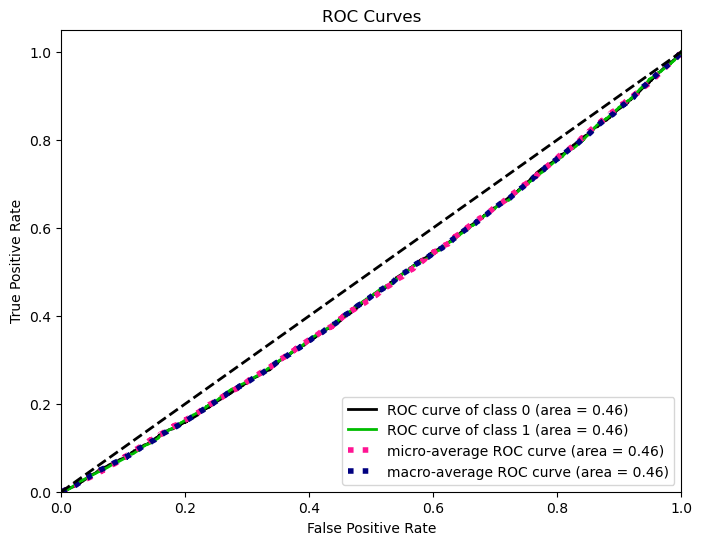

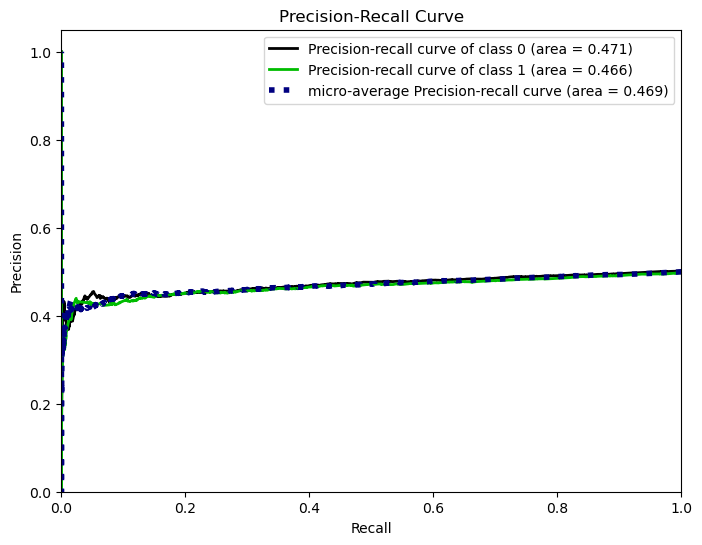

In [72]:
evaluate_model(best_GB, x_test, y_test)

In [73]:
conf_matrix = confusion_matrix(y_test, y_pred_GB)
ConfusionMatrixDisplay.from_estimator(GB_fit, x_test, y_test)


Feature Importance/Rank Analysis: 
1. feature 0 ms_played (0.148685)
2. feature 4 acousticness (0.107414)
3. feature 6 energy (0.092509)
4. feature 10 loudness (0.086723)
5. feature 8 instrumentalness (0.075443)
6. feature 9 liveness (0.073506)
7. feature 12 speechiness (0.071550)
8. feature 14 tempo (0.063659)
9. feature 13 valence (0.061432)
10. feature 5 danceability (0.056142)
11. feature 1 frequency (0.050981)
12. feature 3 popularity (0.047651)
13. feature 2 release_date (0.034712)
14. feature 7 key (0.027132)
15. feature 15 time_signature (0.002461)
16. feature 11 mode (0.000000)


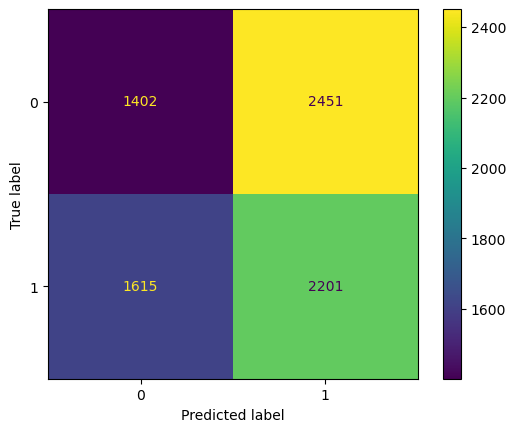

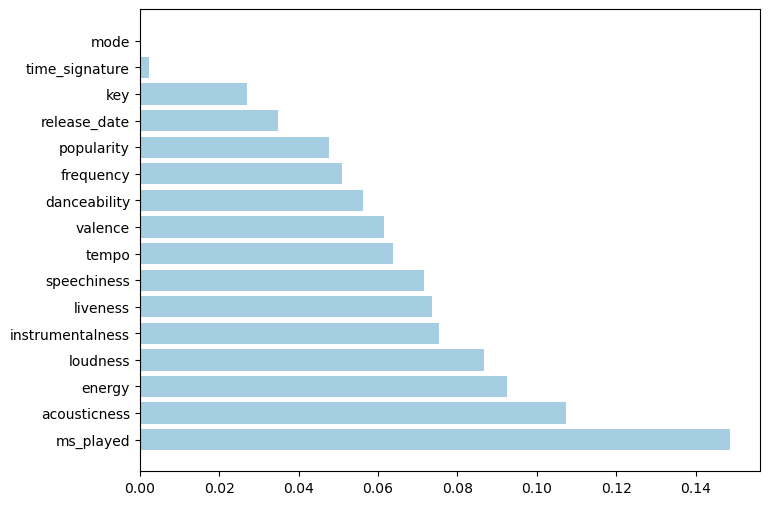

In [74]:
featureRank_Analysis(best_GB, df, df.columns)

In [75]:
!pip install xgboost

## XG Boost

In [76]:
# importing the xgboost library
import xgboost as xgb

# using gridsearch for hyperparameter tuning
# resource: https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/
def XG_training_model(X_train, y_train):
        model = xgb.XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)
        
        # parameters
        parameters = {'learning_rate': [0.01],
                      'n_estimators' : [100],
                      'max_depth'    : [2] 
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, scoring = 'roc_auc',
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)
    
best_XG = XG_training_model(x_train, y_train.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, ...)

 The best score across ALL searched params:
 0.47940607337710917

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 

In [77]:
# initializing the best fit model according the hyperparameter tuning above and training the model
#best_XG = xgb.XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42,
#                           learning_rate = 0.01, max_depth = 2, n_estimators = 100)
XG_fit = best_XG.fit(x_train, y_train.ravel())

# Obtaining predictions and outputing the accuracy
y_pred_XG = XG_fit.predict(x_test)
XG_acc = accuracy_score(y_test, y_pred_XG)


Evaluation of the trained model: 

Accuracy :  0.4700743252053723

Kappa Score :  -0.05989735799121143

Confusion Matrix :
 [[1829 2024]
 [2040 1776]]

Classification Report :
               precision    recall  f1-score   support

           0       0.47      0.47      0.47      3853
           1       0.47      0.47      0.47      3816

    accuracy                           0.47      7669
   macro avg       0.47      0.47      0.47      7669
weighted avg       0.47      0.47      0.47      7669



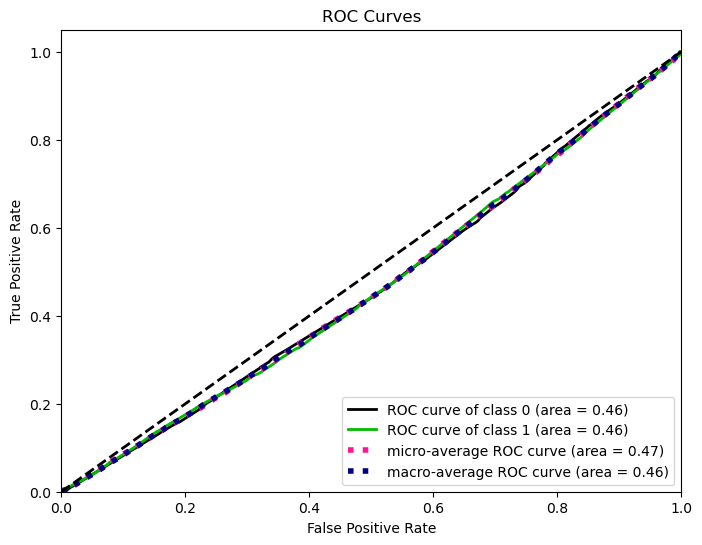

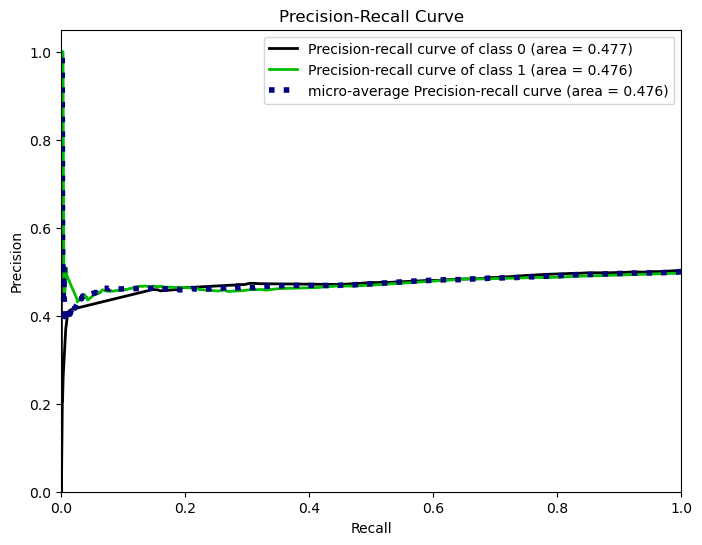

In [78]:
# taking a look at the ROC curves
evaluate_model(best_XG, x_test, y_test)

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred_XG)
ConfusionMatrixDisplay.from_estimator(XG_fit, x_test, y_test)


Feature Importance/Rank Analysis: 
1. feature 10 loudness (0.133811)
2. feature 14 tempo (0.127855)
3. feature 9 liveness (0.101769)
4. feature 2 release_date (0.099596)
5. feature 4 acousticness (0.094683)
6. feature 5 danceability (0.091384)
7. feature 8 instrumentalness (0.086852)
8. feature 13 valence (0.075077)
9. feature 7 key (0.069368)
10. feature 12 speechiness (0.064120)
11. feature 3 popularity (0.055485)
12. feature 15 time_signature (0.000000)
13. feature 11 mode (0.000000)
14. feature 6 energy (0.000000)
15. feature 1 frequency (0.000000)
16. feature 0 ms_played (0.000000)


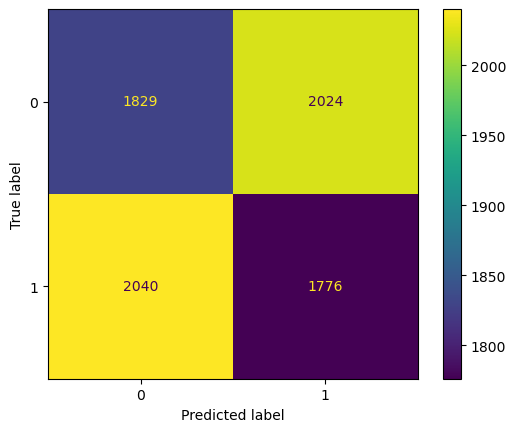

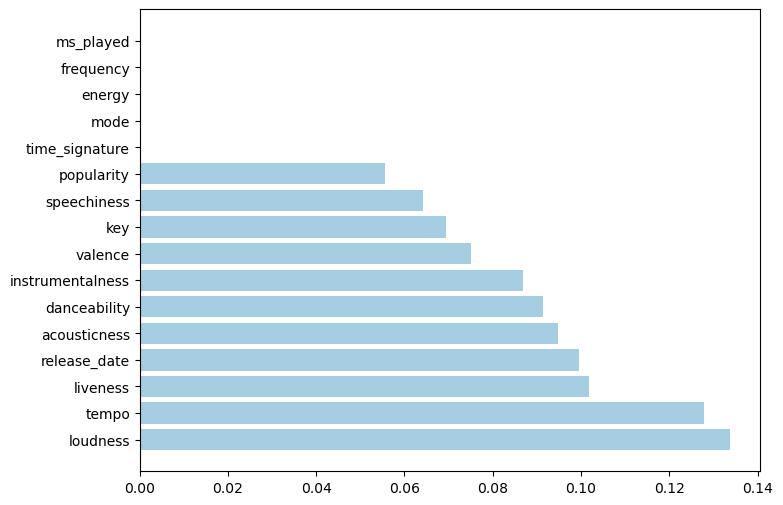

In [80]:
# examining feature rank        
featureRank_Analysis(best_XG, df, df.columns)

## Bagging

In [81]:
# importing baggingclassifier and svc from scikit-learn
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

"""
Fitting 5 folds for each of 192 candidates, totalling 960 fits

========================================================
 Results from Grid Search 
========================================================

 The best estimator across ALL searched params:
 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_features=0.7, max_samples=0.1, n_estimators=100)

 The best score across ALL searched params:
 0.4819019934228003

 The best parameters across ALL searched params:
 {'base_estimator__max_depth': 2, 'max_features': 0.7, 'max_samples': 0.1, 'n_estimators': 100}

 ========================================================
"""

# using gridsearch for hyperparameter tuning
# resource: https://stackoverflow.com/questions/47570307/tuning-parameters-of-the-classifier-used-by-baggingclassifier
def bag_training_model(X_train, y_train):
        model = BaggingClassifier(DecisionTreeClassifier(max_depth = 1), 
                                  n_estimators = 500, max_samples = 0.5, max_features = 0.5)
        
        # parameters
        parameters = {'base_estimator__max_depth' : [2],
                      'n_estimators' : [100],
                      'max_samples' : [0.1],
                      'max_features' : [0.7]
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, scoring = 'roc_auc',
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)
    
best_bag = bag_training_model(x_train, y_train.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator BaggingClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. This mig


 Results from Grid Search 

 The best estimator across ALL searched params:
 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_features=0.7, max_samples=0.1, n_estimators=100)

 The best score across ALL searched params:
 0.471512709806464

 The best parameters across ALL searched params:
 {'base_estimator__max_depth': 2, 'max_features': 0.7, 'max_samples': 0.1, 'n_estimators': 100}




Evaluation of the trained model: 

Accuracy :  0.4822010692397966

Kappa Score :  -0.03538095697400667

Confusion Matrix :
 [[1775 2078]
 [1893 1923]]

Classification Report :
               precision    recall  f1-score   support

           0       0.48      0.46      0.47      3853
           1       0.48      0.50      0.49      3816

    accuracy                           0.48      7669
   macro avg       0.48      0.48      0.48      7669
weighted avg       0.48      0.48      0.48      7669



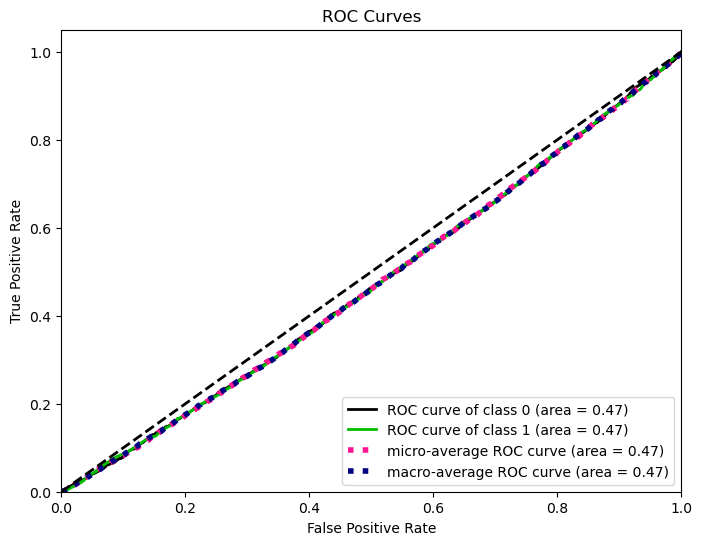

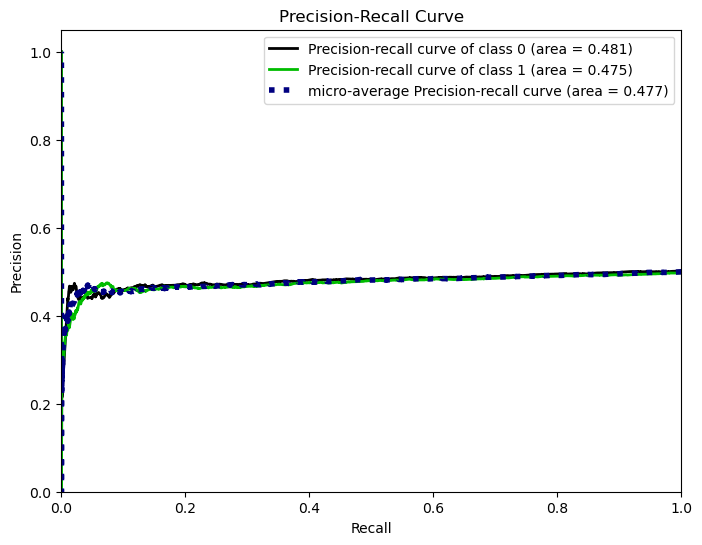

In [82]:
#best_bag = BaggingClassifier(DecisionTreeClassifier(max_depth = 2), 
#                                  n_estimators = 200, max_samples = 0.1, max_features = 0.7)
bag_fit = best_bag.fit(x_train, y_train.ravel())
y_pred_bag = bag_fit.predict(x_test)

# getting the overall accuracy score
bag_acc = accuracy_score(y_test, y_pred_bag)

# taking a look at the ROC curves
evaluate_model(best_bag, x_test, y_test)

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred_bag)
ConfusionMatrixDisplay.from_estimator(bag_fit, x_test, y_test)

## Random Forest

In [84]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

"""
Fitting 2 folds for each of 500 candidates, totalling 1000 fits

========================================================
 Results from Grid Search 
========================================================

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=100,
                       random_state=43)

 The best score across ALL searched params:
 0.44468987799976134

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 100}

 ========================================================
"""

def rf_training_model(X_train, y_train):
        model = RandomForestClassifier(n_estimators = 100, random_state = 43)
        
        # parameters
        parameters = {"n_estimators" : [100],
                      "max_depth" : [8],
                      "min_samples_split" : [100],
                      "min_samples_leaf" : [10]
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, scoring = 'roc_auc',
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)
    
rf_best = rf_training_model(x_train, y_train.ravel())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. Thi


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=100,
                       random_state=43)

 The best score across ALL searched params:
 0.44468987799976134

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 100}




Evaluation of the trained model: 

Accuracy :  0.40787586386751856

Kappa Score :  -0.18426838810388846

Confusion Matrix :
 [[1580 2273]
 [2268 1548]]

Classification Report :
               precision    recall  f1-score   support

           0       0.41      0.41      0.41      3853
           1       0.41      0.41      0.41      3816

    accuracy                           0.41      7669
   macro avg       0.41      0.41      0.41      7669
weighted avg       0.41      0.41      0.41      7669



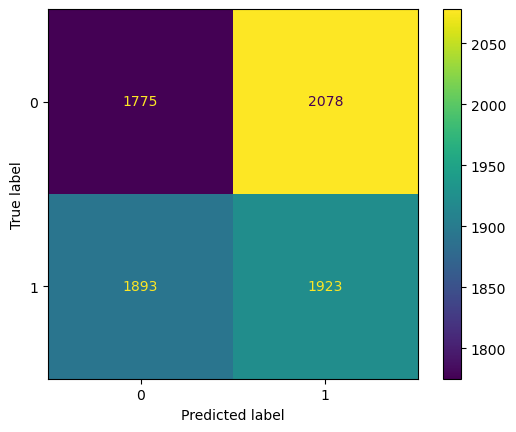

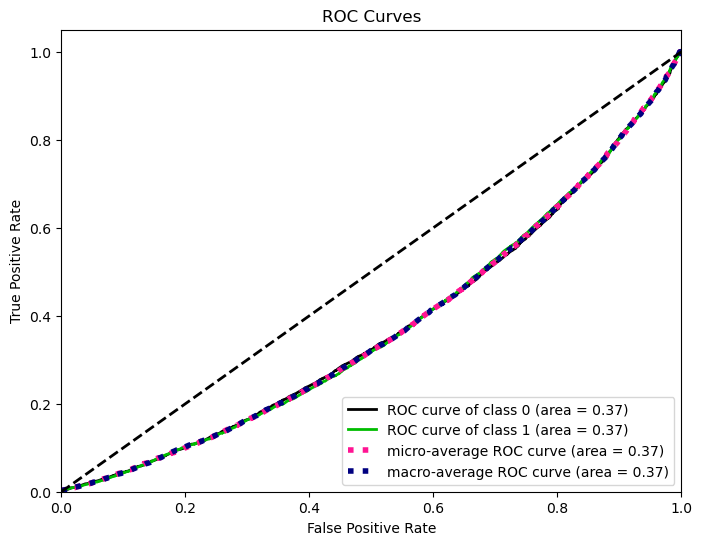

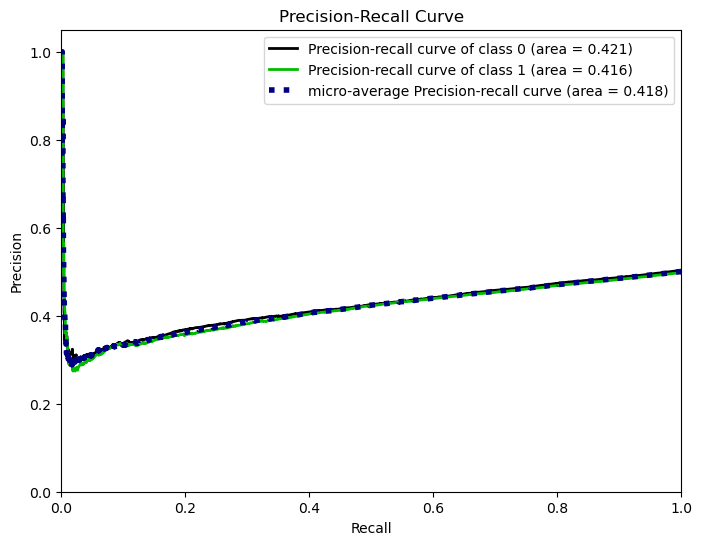

In [85]:
## best fit rf model
#rf_best = RandomForestClassifier(n_estimators= 100, max_depth = 8, min_samples_leaf = 10, 
#                                 min_samples_split= 100, random_state = 43)

# Train the model on training data
rf_fit = rf_best.fit(x_train, y_train.ravel())

y_pred_rf = rf_fit.predict(x_test)

# getting the overall accuracy score
rf_acc = accuracy_score(y_test, y_pred_rf)

# taking a look at the ROC curves
evaluate_model(rf_best, x_test, y_test)

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay.from_estimator(rf_fit, x_test, y_test)


Feature Importance/Rank Analysis: 
1. feature 0 ms_played (0.131264)
2. feature 4 acousticness (0.085620)
3. feature 10 loudness (0.084566)
4. feature 12 speechiness (0.079935)
5. feature 9 liveness (0.075590)
6. feature 6 energy (0.074886)
7. feature 5 danceability (0.074875)
8. feature 13 valence (0.074866)
9. feature 14 tempo (0.073486)
10. feature 3 popularity (0.060077)
11. feature 1 frequency (0.049886)
12. feature 2 release_date (0.045887)
13. feature 8 instrumentalness (0.043952)
14. feature 7 key (0.033984)
15. feature 15 time_signature (0.005977)
16. feature 11 mode (0.005151)


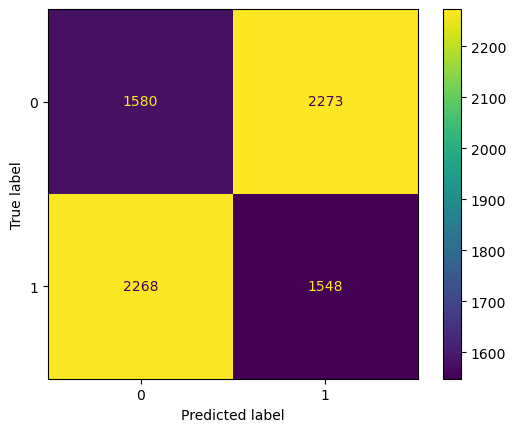

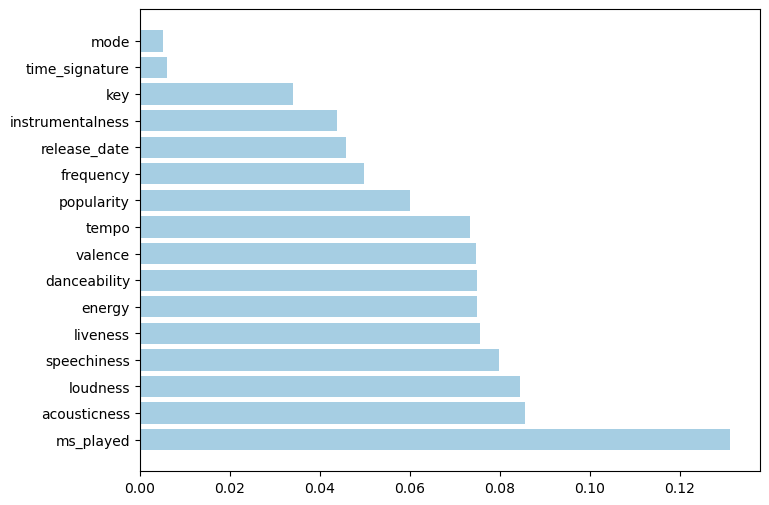

In [87]:
# examining feature rank        
featureRank_Analysis(rf_best, df, df.columns)

## Logistic Regression


Evaluation of the trained model: 

Accuracy :  0.40787586386751856

Kappa Score :  -0.18426838810388846

Confusion Matrix :
 [[1580 2273]
 [2268 1548]]

Classification Report :
               precision    recall  f1-score   support

           0       0.41      0.41      0.41      3853
           1       0.41      0.41      0.41      3816

    accuracy                           0.41      7669
   macro avg       0.41      0.41      0.41      7669
weighted avg       0.41      0.41      0.41      7669



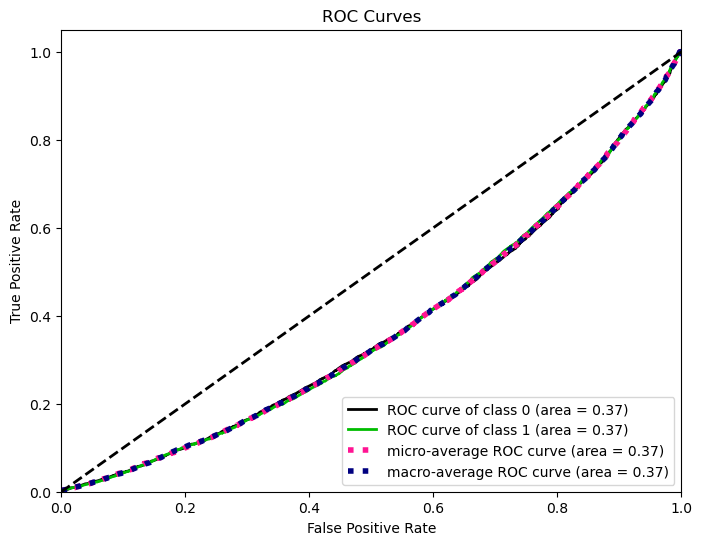

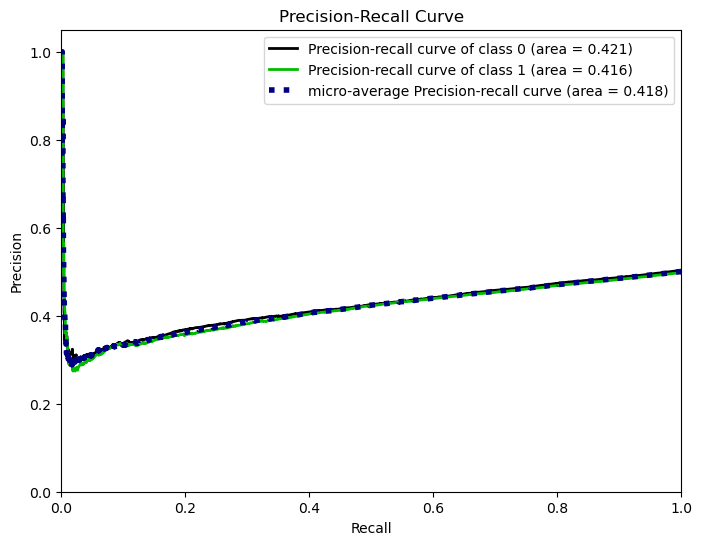

In [88]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000, random_state=43)

# Train the model on training data
lr_fit = lr.fit(x_train, y_train.ravel())

y_pred_lr = lr_fit.predict(x_test)

# getting the overall accuracy score
lr_acc = accuracy_score(y_test, y_pred_lr)

# taking a look at the ROC curves
evaluate_model(rf_best, x_test, y_test)

In [89]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay.from_estimator(lr_fit, x_test, y_test)

## SVM

In [90]:
## resource: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
from sklearn.svm import SVC

"""
Fitting 2 folds for each of 15 candidates, totalling 30 fits

========================================================
 Results from Grid Search 
========================================================

 The best estimator across ALL searched params:
 SVC(C=10, kernel='sigmoid', probability=True, random_state=43)

 The best score across ALL searched params:
 0.5042936915340985

 The best parameters across ALL searched params:
 {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}

 ========================================================
"""

def svm_training_model(X_train, y_train):
        model = SVC(random_state = 43, probability=True)
        
        # parameters
        parameters = {"kernel" : ['sigmoid'],
                      "C" : [10],
                      "gamma" : ['scale']
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, scoring = 'roc_auc',
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)
    
svm_best = svm_training_model(x_train, y_train.ravel())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(



 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, kernel='sigmoid', probability=True, random_state=43)

 The best score across ALL searched params:
 0.5042936915340985

 The best parameters across ALL searched params:
 {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}




Evaluation of the trained model: 

Accuracy :  0.48963358977702437

Kappa Score :  -0.020759149265412447

Confusion Matrix :
 [[1897 1956]
 [1958 1858]]

Classification Report :
               precision    recall  f1-score   support

           0       0.49      0.49      0.49      3853
           1       0.49      0.49      0.49      3816

    accuracy                           0.49      7669
   macro avg       0.49      0.49      0.49      7669
weighted avg       0.49      0.49      0.49      7669



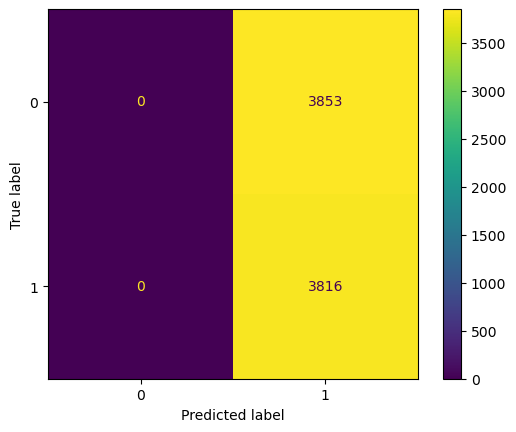

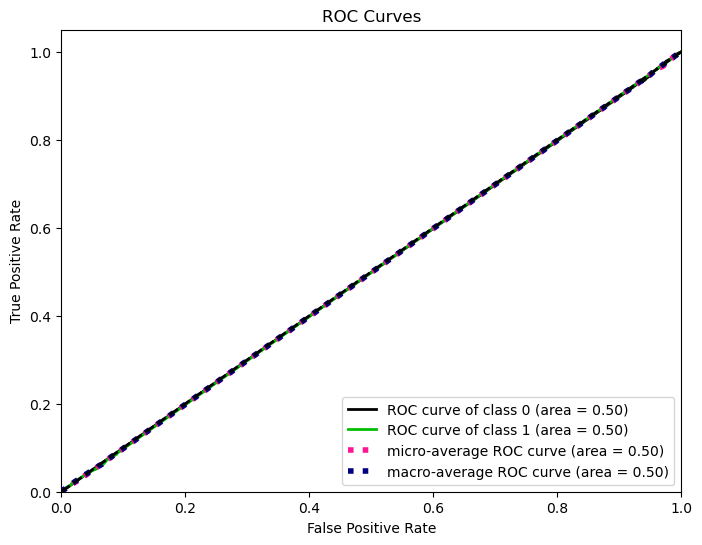

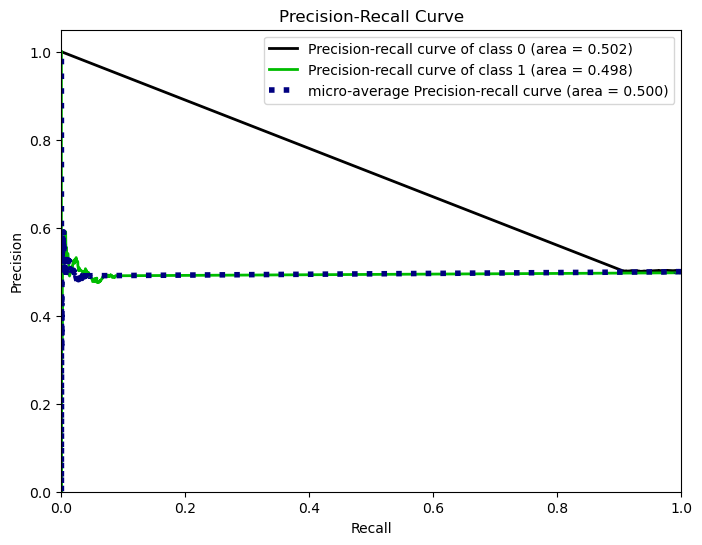

In [91]:
## best fit rf model
#svm_best = SVC(kernel = "sigmoid", C = 10, gamma = "scale", random_state = 43, probability=True)

# Train the model on training data
svm_fit = svm_best.fit(x_train, y_train.ravel())

y_pred_svm = svm_fit.predict(x_test)

# getting the overall accuracy score
svm_acc = accuracy_score(y_test, y_pred_svm)

# taking a look at the ROC curves
evaluate_model(svm_best, x_test, y_test)

In [92]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay.from_estimator(svm_fit, x_test, y_test)

## Ridge Classifier

In [93]:
## resource: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
"""
from sklearn.linear_model import RidgeClassifier

def ridge_training_model(X_train, y_train):
        model = RidgeClassifier(random_state = 43)
        
        # parameters
        parameters = {"alpha" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, scoring = 'roc_auc',
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)
    
ridge_best = ridge_training_model(x_train, y_train.ravel())
"""

'\nfrom sklearn.linear_model import RidgeClassifier\n\ndef ridge_training_model(X_train, y_train):\n        model = RidgeClassifier(random_state = 43)\n        \n        # parameters\n        parameters = {"alpha" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]\n                      }\n        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, scoring = \'roc_auc\',\n                            verbose = 1, n_jobs = -1, refit = True)\n        grid.fit(X_train, y_train)\n\n        # Results from Grid Search\n        print("\n========================================================")\n        print(" Results from Grid Search " )\n        print("========================================================")    \n        print("\n The best estimator across ALL searched params:\n",\n              grid.best_estimator_)\n        print("\n The best score across ALL searched params:\n",\n              grid.best_score_)\n        print("\n The best parameters across ALL searc

In [94]:
## best fit rf model
#ridge_best = RidgeClassifier(alpha = 0.6, random_state = 43)

# Train the model on training data
"""
ridge_fit = ridge_best.fit(x_train, y_train.ravel())

y_pred_ridge = ridge_fit.predict(x_test)

# getting the overall accuracy score
ridge_acc = accuracy_score(y_test, y_pred_ridge)

# taking a look at the ROC curves
evaluate_model(ridge_best, x_test, y_test)
"""

'\nridge_fit = ridge_best.fit(x_train, y_train.ravel())\n\ny_pred_ridge = ridge_fit.predict(x_test)\n\n# getting the overall accuracy score\nridge_acc = accuracy_score(y_test, y_pred_ridge)\n\n# taking a look at the ROC curves\nevaluate_model(ridge_best, x_test, y_test)\n'

In [95]:
!pip install mlxtend

## Stacked Model

In [96]:
# Initializing the StackingCV classifier
# resource: https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840
from mlxtend.classifier import StackingCVClassifier

sclf = StackingCVClassifier(classifiers = [lr, rf_best, svm_best, best_bag, ada_best, best_XG],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))



In [97]:
# Train the model on training data
stack_fit = sclf.fit(x_train, y_train.ravel())

y_pred_stack = stack_fit.predict(x_test)

# getting the overall accuracy score
stack_acc = accuracy_score(y_test, y_pred_stack)


Evaluation of the trained model: 

Accuracy :  0.5968183596296779

Kappa Score :  0.1936991109133187

Confusion Matrix :
 [[2267 1586]
 [1506 2310]]

Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.59      0.59      3853
           1       0.59      0.61      0.60      3816

    accuracy                           0.60      7669
   macro avg       0.60      0.60      0.60      7669
weighted avg       0.60      0.60      0.60      7669



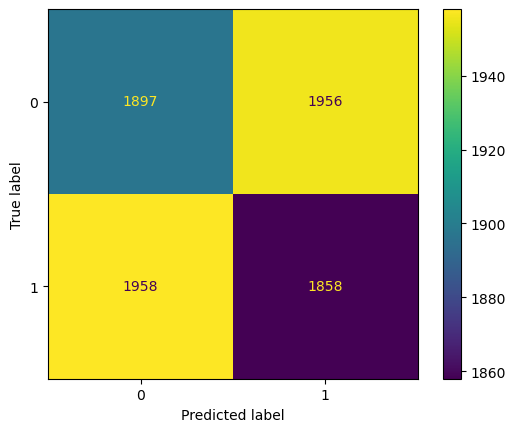

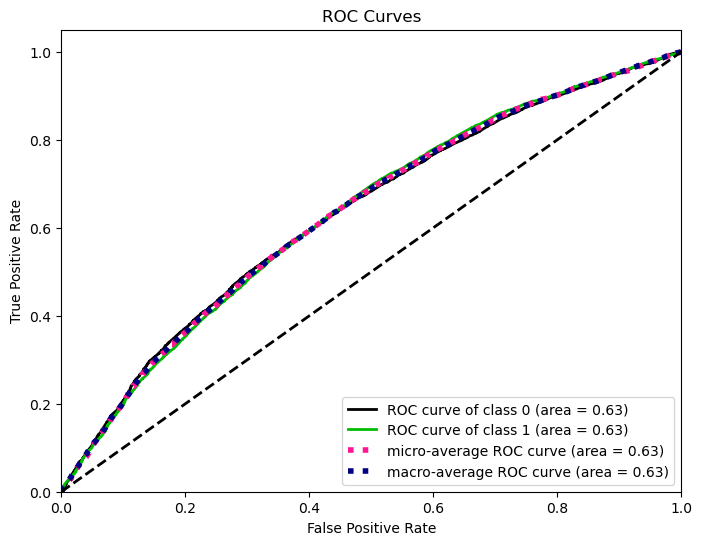

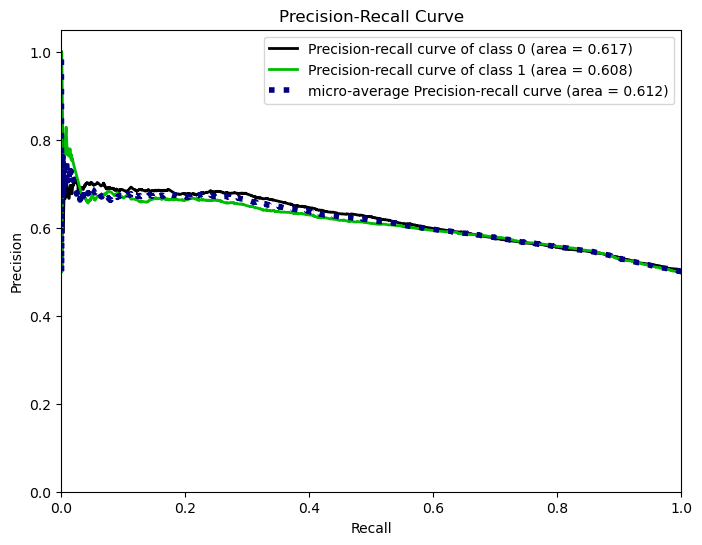

In [98]:
# taking a look at the ROC curves
evaluate_model(sclf, x_test, y_test)

In [99]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(20,20))
set_palette("Paired")

conf_matrix = confusion_matrix(y_test, y_pred_stack)
ConfusionMatrixDisplay.from_estimator(stack_fit, x_test, y_test)
plt.savefig('confusion_matrix_stacked.jpg')

## Boxplots

In [100]:
# Create list to store classifiers
classifiers = {"SVM": svm_best,
               "Logistic Regression": lr,
               "RF": rf_best,
               "Bagging": best_bag,
               "Adaboost": ada_best,
               "XG Boost": best_XG,
               "Stack": sclf}

In [101]:
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# Function to evaluate the list of models
def eval_models(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x_df, y_df.ravel(), scoring='accuracy', cv=cv, n_jobs=-1, 
                            error_score='raise')
    return scores

In [102]:
# evaluate the models and store results
from sklearn.model_selection import cross_val_score
results, names = list(), list() 

for name, model in classifiers.items():
    print(name, model) # to check for where fault occurs
    scores = eval_models(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

SVM SVC(C=10, kernel='sigmoid', probability=True, random_state=43)


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at 

>SVM 0.500 (0.008)
Logistic Regression LogisticRegression(max_iter=1000, random_state=43)


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0 when using version 1.1.2. This might lead

>Logistic Regression 0.488 (0.008)
RF RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=100,
                       random_state=43)


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. Thi

>RF 0.345 (0.007)
Bagging BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_features=0.7, max_samples=0.1, n_estimators=100)


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator BaggingClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. This mig

>Bagging 0.470 (0.010)
Adaboost AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)


/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0 when using version 1.1.2. This might lead

>Adaboost 0.451 (0.008)
XG Boost XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, ...)
>XG Boost 0.460 (0.010)
Stack StackingCVClassifier(classifiers=[LogisticRegression(max_iter=1000,
                                                     random_state=43),
                                  RandomForestClassifier(max_depth=8,
                                      

/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ninathomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.1.2. This might 

KeyboardInterrupt: 

In [ ]:
classmod = pd.DataFrame(np.transpose(results), columns = ["SVM","Logistic Regression", "RF", "Bagging","Adaboost","XG Boost", "Stacking"])
classmod = pd.melt(classmod.reset_index(), id_vars='index',value_vars=["SVM","Logistic Regression", "RF", "Bagging","Adaboost","XG Boost", "Stacking"])
classmod

ValueError: Empty data passed with indices specified.

In [ ]:
import plotly.express as px
fig = px.box(classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
fig.show()
#fig.write_image("Boxplot.jpeg",engine="orca",format="png", width=1600, height=700, scale=0.75)

from pathlib import Path

with Path("Boxplot.html").open("w") as f:
    f.write(fig.to_html())

NameError: name 'classmod' is not defined

In [ ]:
# --------------------------------------------------------------------------- #
# 
# 10/11/22 – Save model performance to .svg file to be used in app deployment
# 
# --------------------------------------------------------------------------- #
fig.write_image('app/static/model_performance_1.svg')

NameError: name 'fig' is not defined

In [ ]:
classifiers_all = {"SVM": svm_best, "RF": rf_best, "Bagging": best_bag, 
                   "Adaboost": ada_best, "XG Boost": best_XG, "Logistic Regression": lr, 
                   "Gradient Boosting": best_GB}

In [ ]:
result_all, names_all = list(), list() 

for name, model in classifiers_all.items():
    scores = eval_models(model)
    result_all.append(scores)
    names_all.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>SVM 0.500 (0.008)
>Ridge 0.474 (0.010)
>RF 0.345 (0.007)
>Bagging 0.459 (0.010)
>Adaboost 0.451 (0.008)
>XG Boost 0.460 (0.010)
>Logistic Regression 0.488 (0.008)
>Gradient Boosting 0.440 (0.009)


In [ ]:
classmod2 = pd.DataFrame(np.transpose(result_all), columns = ["SVM", "RF","Bagging","Adaboost","XG Boost", "Logistic Regression","Gradient Boosting"])
classmod2 = pd.melt(classmod2.reset_index(), id_vars='index',value_vars=["SVM", "RF","Bagging","Adaboost","XG Boost",  "Logistic Regression","Gradient Boosting"])
classmod2

,index,variable,value
0,0,SVM,0.487290
1,1,SVM,0.494329
2,2,SVM,0.502151
3,3,SVM,0.508998
4,4,SVM,0.499609
...,...,...,...
235,25,Gradient Boosting,0.432316
236,26,Gradient Boosting,0.431142
237,27,Gradient Boosting,0.449531
238,28,Gradient Boosting,0.429969


In [ ]:
fig = px.box(classmod2, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
fig.show()
#fig.write_image("Boxplot.jpeg",engine="orca",format="png", width=1600, height=700, scale=0.75)

In [ ]:
# --------------------------------------------------------------------------- #
# 
# 10/11/22 – Save model performance to .svg file to be used in app deployment
# 
# --------------------------------------------------------------------------- #
fig.write_image('app/static/model_performance.svg')

NameError: name 'fig' is not defined

## Pickle

In [ ]:
import pickle

# Save to file in the current working directory
# pkl_filename = "StackedPickle.pkl"

# In Nakul's examples, save the file to a subfolder within the app folder:
pkl_filename = "app/TrainedModel/StackedPickle.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(sclf, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 59.60 %


In [ ]:
def hello_world():
    pkl_filename = "StackedPickle.pkl"
    testvalue = x_test[1].reshape(1, -1)
    test_input = testvalue
    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
    predict = pickle_model.predict(test_input)
    predict_as_str = str(predict)
    return predict_as_str

hello_world()

'[1]'

In [ ]:
def floatsome_to_np_array(floats_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
    return floats.reshape(len(floats), 1)